In [7]:
from kaggle.api.kaggle_api_extended import KaggleApi

In [8]:
api = KaggleApi()

api.authenticate()

In [9]:
api.competition_download_file('nlp-getting-started',
                             'test.csv',
                             path='./')
api.competition_download_file('nlp-getting-started',
                             'train.csv',
                             path='./')

100%|██████████| 411k/411k [00:01<00:00, 212kB/s]


100%|██████████| 965k/965k [00:01<00:00, 580kB/s]

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('train.csv')

df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


<Axes: xlabel='target'>

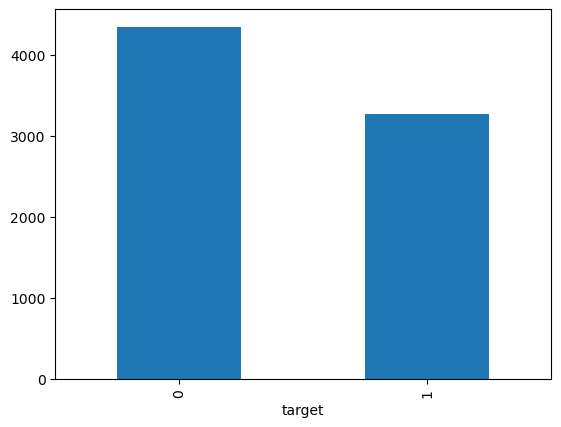

In [15]:
# Checking the number of sentiment classes
df['target'].value_counts().plot(kind='bar')

In [16]:
seq_len = 512
num_samples = len(df)

num_samples, seq_len

(7613, 512)

In [17]:
from transformers import BertTokenizer

In [18]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [19]:
tokens = tokenizer(df['text'].tolist(), max_length=seq_len, truncation=True, padding='max_length', add_special_tokens=True, return_tensors='np')

In [20]:
tokens.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [21]:
tokens['input_ids']

array([[  101,  3458,  9115, ...,     0,     0,     0],
       [  101,  4089,  1783, ...,     0,     0,     0],
       [  101,  1398,  3159, ...,     0,     0,     0],
       ...,
       [  101, 26528,   119, ...,     0,     0,     0],
       [  101,  3284, 11950, ...,     0,     0,     0],
       [  101,  1109,  6372, ...,     0,     0,     0]])

In [22]:
tokens['attention_mask']

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [23]:
import numpy as np

with open('disaster-xids.npy', 'wb') as f:
    np.save(f, tokens['input_ids'])

with open('disaster-xmask.npy', 'wb') as f:
    np.save(f, tokens['attention_mask'])

In [24]:
# Save target as a binary file
arr = df['target'].values

In [25]:
arr.shape

(7613,)

In [26]:
arr

array([1, 1, 1, ..., 1, 1, 1])

In [27]:
arr.max() + 1

2

In [29]:
with open('disaster-labels.npy', 'wb') as f:
    np.save(f, df['target'])